In [3]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import pylab as pl
import numpy as np

import warnings                              # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
import pandas as pd

df_1= pd.read_parquet("part-00000-c39f1c5c-b6aa-4659-8dd9-965ccc023d43-c000.snappy.parquet")
df_2 =pd.read_parquet("part-00001-912fc2f1-c131-4414-b9d8-bd9d4095ada5-c000.snappy.parquet")
df = pd.concat([df_1, df_2], axis=0, ignore_index=True)
df.tail()

,text,date,sentiment_score,btc_current_price,btc_price_24h_later,price_change_24h_in_%
781,Kelly Cooper is a fantastic America First Cand...,2024-10-30 14:25:00,0.9750,72161.0,NaN,NaN
782,Derek Merrin is a fantastic America First Cand...,2024-10-30 14:31:00,0.9818,72133.0,NaN,NaN
783,Congresswoman Carol Miller is a Fantastic Advo...,2024-10-30 14:31:00,0.9614,72133.0,NaN,NaN
784,"""RT @TeamTrumpPRESIDENT TRUMP: IN CONCLUSION",2024-11-03 18:15:00,0.0000,68333.0,NaN,NaN
785,"""KAMALA BROKE IT, BUT I WILL FIX IT! With your...",2024-11-03 23:32:00,0.9760,68752.0,NaN,NaN


In [5]:
df.isnull().sum()

text                      0
date                      0
sentiment_score           0
btc_current_price         0
btc_price_24h_later      27
price_change_24h_in_%    27
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df['date'] = pd.to_datetime(df['date'])
start_date = pd.to_datetime("2017-01-20")
end_date = pd.to_datetime("2021-01-20")
df['is_president'] = np.where((df['date'] >= start_date) & (df['date'] <= end_date),1,0)
df['is_president'].value_counts()

is_president
0    511
1    248
Name: count, dtype: int64

In [8]:
df2=pd.read_csv("dataset.csv")
df2

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984
...,...,...,...,...,...
1880,2023-03-27,64.0,Greed,27139.888672,18188895178
1881,2023-03-28,59.0,Greed,27268.130859,17783600385
1882,2023-03-29,57.0,Greed,28348.441406,20684945906
1883,2023-03-30,60.0,Greed,28033.562500,22435349951


In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['date'] = df['date'].dt.date
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d', errors='coerce')
df2['Date'] = df2['Date'].dt.date

merged_df = pd.merge(df, df2, left_on='date', right_on='Date', how='inner')
merged_df.drop(columns=['Date'], inplace=True)

merged_df


,text,date,sentiment_score,btc_current_price,btc_price_24h_later,price_change_24h_in_%,is_president,Value,Value_Classification,BTC_Closing,BTC_Volume
0,With 3.5 million Americans receiving bonuses o...,2018-02-02,0.8252,8400.00,8959.99,6.67,1,15.0,Extreme Fear,8830.750000,12726899712
1,"Stock Market up almost 40% since the Election,...",2018-06-11,-0.8777,6725.61,6744.43,0.28,1,15.0,Extreme Fear,6906.919922,4745269760
2,RT @Scavino45: “Hispanic-Latino Unemployment R...,2018-07-07,-0.6705,6591.65,6742.98,2.30,1,34.0,Fear,6856.930176,3961080064
3,In speaking with some of the world’s top busin...,2018-08-17,0.9184,6501.96,6489.24,-0.20,1,19.0,Extreme Fear,6580.629883,4992990000
4,Longest bull run in the history of the stock m...,2018-08-22,0.6360,6405.34,6450.65,0.71,1,21.0,Extreme Fear,6376.709961,4668110000
...,...,...,...,...,...,...,...,...,...,...,...
333,OUR NATION IS NOW THIRD WORLD &amp; DYING. THE...,2023-03-18,-0.9695,27550.00,27041.00,-1.85,0,64.0,Greed,26965.878906,35723036817
334,"IT’S TIME!!! WE ARE A NATION IN STEEP DECLINE,...",2023-03-18,-0.9946,27511.00,27279.00,-0.84,0,64.0,Greed,26965.878906,35723036817
335,"""RT @realDonaldTrumpOUR NATION IS NOW THIRD WO...",2023-03-18,-0.5562,27268.00,28087.00,3.00,0,64.0,Greed,26965.878906,35723036817
336,"China, Russia, Iran, North Korea and other Nat...",2023-03-20,-0.3758,28168.00,28046.00,-0.43,0,66.0,Greed,27767.236328,44774027664


In [10]:
merged_df.isnull().sum()

text                     0
date                     0
sentiment_score          0
btc_current_price        0
btc_price_24h_later      0
price_change_24h_in_%    0
is_president             0
Value                    0
Value_Classification     0
BTC_Closing              0
BTC_Volume               0
dtype: int64

In [11]:
columns_to_keep=["sentiment_score","btc_price_24h_later","is_president","Value","BTC_Volume"]
merged_df=merged_df[columns_to_keep]
merged_df

,sentiment_score,btc_price_24h_later,is_president,Value,BTC_Volume
0,0.8252,8959.99,1,15.0,12726899712
1,-0.8777,6744.43,1,15.0,4745269760
2,-0.6705,6742.98,1,34.0,3961080064
3,0.9184,6489.24,1,19.0,4992990000
4,0.6360,6450.65,1,21.0,4668110000
...,...,...,...,...,...
333,-0.9695,27041.00,0,64.0,35723036817
334,-0.9946,27279.00,0,64.0,35723036817
335,-0.5562,28087.00,0,64.0,35723036817
336,-0.3758,28046.00,0,66.0,44774027664


## 1) LINEAR REGRESSION

In [13]:
data=merged_df

In [14]:
from sklearn.model_selection import train_test_split

target = "btc_price_24h_later"

data_model, data_reserved = train_test_split(data, test_size=0.1, random_state=42)
print ("Sample size dataset reserved for prediction: ", data_reserved.shape[0], "records")

# Sets y
y = data_model[target]

Sample size dataset reserved for prediction:  34 records


In [15]:
data_model.shape

(304, 5)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_model, y, train_size = 0.8, random_state=42)
print ("Sample size train dataset: ", X_train.shape)
print ("Sample size test dataset: ", X_test.shape)

Sample size train dataset:  (243, 5)
Sample size test dataset:  (61, 5)


In [17]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out = 0.1,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.4}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.4}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [18]:
irrelevant_columns = [target]
X_train2=X_train.drop(columns=irrelevant_columns)

for field in X_train2:
    if X_train2[field].isnull().any():
        X_train2=X_train2.drop(labels=[field], axis=1)

X_train2

,sentiment_score,is_president,Value,BTC_Volume
325,0.7034,0,55.0,27423687259
200,-0.7759,1,45.0,22194988641
218,-0.0772,1,41.0,14906809639
314,0.9196,0,29.0,11656379938
204,-0.2263,1,39.0,15053082175
...,...,...,...,...
315,-0.9413,0,25.0,18624736866
59,-0.7371,1,38.0,15160167779
253,0.0000,1,41.0,33430927462
243,0.4939,1,41.0,31288157264


In [19]:
result = stepwise_selection(X_train2, y_train)             #This will change every time we run it because the test samples are random
print('resulting features:')                                    #And thus different every time
print(result)

Add  is_president                   with p-value 4.074e-67
Add  Value                          with p-value 2.428e-19
Add  BTC_Volume                     with p-value 4.224e-06
resulting features:
['is_president', 'Value', 'BTC_Volume']


<Axes: >

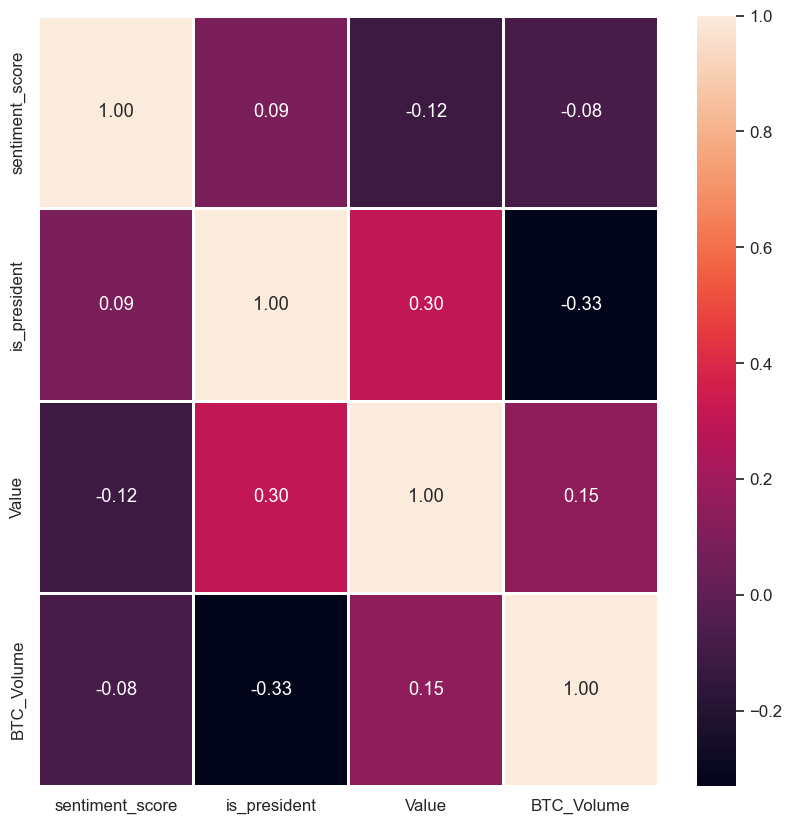

In [20]:
import seaborn as sns  
from matplotlib import pyplot as plt 
X_train_stepwise=X_train2
# and heatmap to show correlation between explanatory variables
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(X_train_stepwise.corr(), annot=True, fmt=".2f", linewidths=1, ax=ax)

In [21]:
lm = LinearRegression(fit_intercept=True)
model=lm.fit(X_train_stepwise, y_train)

In [22]:
# print R squared train dataset
print(f"R squared value is : {model.score(X_train_stepwise,y_train):.3f}")

R squared value is : 0.812


In [23]:
# print coefficients (but not confidence intervals: sklearn does not store them)
coeff_df = pd.DataFrame(model.coef_,X_train_stepwise.columns,columns=['Coefficient'])
print("Intercept: ", lm.intercept_)
coeff_df

Intercept:  16120.748253550337


,Coefficient
sentiment_score,-6.548675e+01
is_president,-1.222873e+04
Value,8.933531e+01
BTC_Volume,7.722347e-08


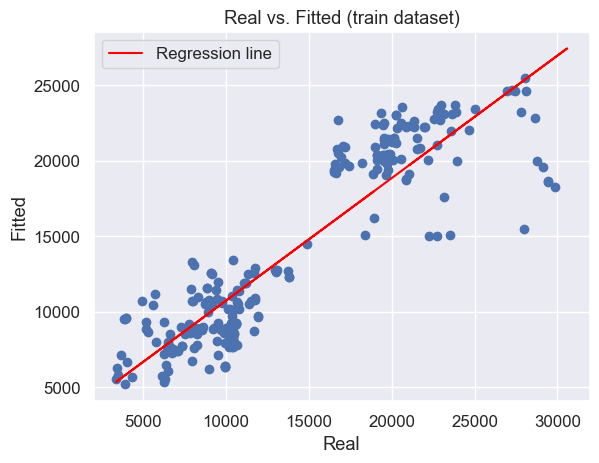

In [24]:
predictions_train = lm.predict(X_train[X_train_stepwise.columns]) #only with the columns used in the model

plt.title("Real vs. Fitted (train dataset)")
plt.scatter(y_train,predictions_train)

coef = np.polyfit(y_train, predictions_train, 1)  
poly1d_fn = np.poly1d(coef)  
plt.plot(y, poly1d_fn(y), color="red", label="Regression line")

plt.xlabel("Real")
plt.ylabel("Fitted")
plt.legend()
plt.show()

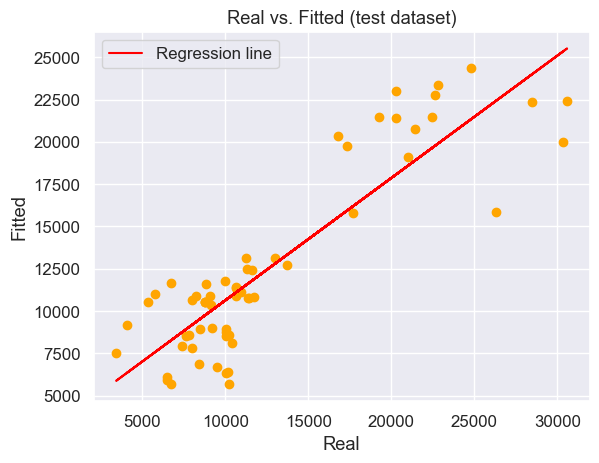

In [25]:
# test dataset
predictions_test = lm.predict(X_test[X_train_stepwise.columns]) #only with the columns used in the model
plt.title("Real vs. Fitted (test dataset)")
plt.scatter(y_test,predictions_test, color="orange")

coef = np.polyfit(y_test, predictions_test, 1)  
poly1d_fn = np.poly1d(coef)  
plt.plot(y_test, poly1d_fn(y_test), color="red", label="Regression line")

plt.xlabel("Real")
plt.ylabel("Fitted")

plt.legend()
plt.show()

In [26]:
from sklearn import metrics

# error comparison between the two datasets
print ("Errors:\n")
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'MAPE %'],
    'Train': [
        metrics.mean_absolute_error(y_train, predictions_train),
        metrics.mean_squared_error(y_train, predictions_train),
        np.sqrt(metrics.mean_squared_error(y_train, predictions_train)),
        np.mean(100 * abs(y_train - predictions_train) / y_train)
    ],
    'Test': [
        metrics.mean_absolute_error(y_test, predictions_test),
        metrics.mean_squared_error(y_test, predictions_test),
        np.sqrt(metrics.mean_squared_error(y_test, predictions_test)),
        np.mean(100 * abs(y_test - predictions_test) / y_test)
    ]
}

results_df = pd.DataFrame(results)
results_df

Errors:



,Metric,Train,Test
0,MAE,2.087694e+03,2.211597e+03
1,MSE,8.499372e+06,9.965831e+06
2,RMSE,2.915368e+03,3.156870e+03
3,MAPE %,1.947112e+01,2.178286e+01


In [27]:
def store_predictions (df):
    df = df.copy()
    # first move target variable to the end to show it along with predictions and errors
    df = df[[col for col in df.columns if col !=target] + [target]]
    
    predictions = lm.predict(df[X_train_stepwise.columns])
    df.loc[:, target + "_predicted"] = predictions
    
    df.loc[:, "error"] = df[target] - df[target + "_predicted"]
    df.loc[:, "%abs error"] = abs(100*df["error"]) /  df[target]
    return df

In [28]:
X_train = store_predictions(X_train)
X_train

,sentiment_score,is_president,Value,BTC_Volume,btc_price_24h_later,btc_price_24h_later_predicted,error,%abs error
325,0.7034,0,55.0,27423687259,23641.00,23105.879305,535.120695,2.263528
200,-0.7759,1,45.0,22194988641,11940.45,9676.895459,2263.554541,18.957029
218,-0.0772,1,41.0,14906809639,10040.07,8710.980176,1329.089824,13.237854
314,0.9196,0,29.0,11656379938,16839.00,19551.396798,-2712.396798,16.107826
204,-0.2263,1,39.0,15053082175,10209.00,8553.369294,1655.630706,16.217364
...,...,...,...,...,...,...,...,...
315,-0.9413,0,25.0,18624736866,17171.00,19854.040498,-2683.040498,15.625418
59,-0.7371,1,38.0,15160167779,10224.09,8505.754132,1718.335868,16.806737
253,0.0000,1,41.0,33430927462,10232.61,10136.421164,96.188836,0.940023
243,0.4939,1,41.0,31288157264,8887.20,9938.605119,-1051.405119,11.830555


In [29]:
X_test = store_predictions(X_test)
X_test

,sentiment_score,is_president,Value,BTC_Volume,btc_price_24h_later,btc_price_24h_later_predicted,error,%abs error
89,-0.3382,1,43.0,15713967523,9168.55,8969.074374,199.475626,2.175651
133,-0.9822,0,21.0,43975248085,19267.00,21457.031966,-2190.031966,11.366751
210,-0.7750,1,5.0,17097508856,10198.38,5709.778905,4488.601095,44.012883
43,0.7249,1,11.0,19990838300,10129.97,6371.000141,3758.969859,37.107414
79,0.0000,1,16.0,42213940994,7817.11,8581.293049,-764.183049,9.775775
...,...,...,...,...,...,...,...,...
4,0.6360,1,21.0,4668110000,6450.65,6086.900881,363.749119,5.638953
23,0.9351,1,71.0,19419875368,6702.56,11673.261938,-4970.701938,74.161245
106,0.5719,1,92.0,49056742893,26308.54,15861.749924,10446.790076,39.708741
226,0.8434,1,50.0,26583653947,9146.66,10356.437281,-1209.777281,13.226438


In [30]:
df_reserved = store_predictions(data_reserved)
df_reserved

,sentiment_score,is_president,Value,BTC_Volume,btc_price_24h_later,btc_price_24h_later_predicted,error,%abs error
110,0.0000,0,16.0,33538210634,30350.49,20140.050115,10210.439885,33.641763
333,-0.9695,0,64.0,35723036817,27041.00,24660.354443,2380.645557,8.803837
185,0.7424,1,72.0,21092024306,11218.59,11904.345683,-685.755683,6.112673
76,0.0000,1,56.0,29893183716,9224.57,11203.254045,-1978.684045,21.450149
211,0.9542,1,5.0,17097508856,10149.08,5596.539220,4552.540780,44.856684
199,-0.8278,1,64.0,23875988832,12238.45,11507.477849,730.972151,5.972751
42,0.2453,1,45.0,16681503537,10468.76,9184.249968,1284.510032,12.269935
260,0.9611,1,52.0,26163972642,11470.13,10494.990874,975.139126,8.501553
209,0.3609,1,11.0,19473084768,9920.79,6354.854596,3565.935404,35.944067
25,-0.2957,1,63.0,20266216022,8475.63,11104.537872,-2628.907872,31.017256


In [31]:
# calculates error, %error and MAPE into the dataframe
print ("Errors in reserved dataset:\n")

print(f"MAE:, {abs(df_reserved['error']).mean():.2f}")

#print(f"R squared value is : {model.score(X_train_stepwise,y_train):.3f}")
MSE = np.square(df_reserved["error"]).mean()

print(f"MSE: {MSE:.2f}") 
print(f"RMSE: {np.sqrt(MSE):.2f}") 
print (f"MAPE %: {df_reserved['%abs error'].mean():.2f}") 

Errors in reserved dataset:

MAE:, 2969.13
MSE: 18995123.57
RMSE: 4358.34
MAPE %: 20.52


#### additional info 

In [33]:
# model with an additional library (statmodels)
X_train_stepwise = sm.add_constant(X_train_stepwise) 

In [34]:
result = sm.OLS(y_train, X_train_stepwise).fit()
print (result.summary())

                             OLS Regression Results                            
Dep. Variable:     btc_price_24h_later   R-squared:                       0.812
Model:                             OLS   Adj. R-squared:                  0.809
Method:                  Least Squares   F-statistic:                     257.2
Date:                 Fri, 14 Mar 2025   Prob (F-statistic):           3.86e-85
Time:                         20:01:12   Log-Likelihood:                -2283.4
No. Observations:                  243   AIC:                             4577.
Df Residuals:                      238   BIC:                             4594.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.612e+04    61

### 2) DECISION TREE

In [36]:
#data_tree = data[['sentiment_score','btc_current_price','btc_price_24h_later']]
data_tree=data

from sklearn.model_selection import train_test_split

def split_df(dataframe, seed=None, percentage=0.8):

    X = dataframe.loc[:, dataframe.columns != target]
    y = dataframe[target]

    return train_test_split(X, y, test_size=1-percentage, random_state=seed)

X_train, X_test, y_train, y_test = split_df(data_tree, seed=42, percentage=0.5)

In [37]:
from sklearn.tree import DecisionTreeRegressor

btc_tree = DecisionTreeRegressor(random_state=42)
btc_tree.fit(X_train, y_train);

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = btc_tree.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE = {0:.4f}".format(mse))

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAPE = {mape:.2f}%")

MSE = 6436233.1749
MAPE = 16.86%


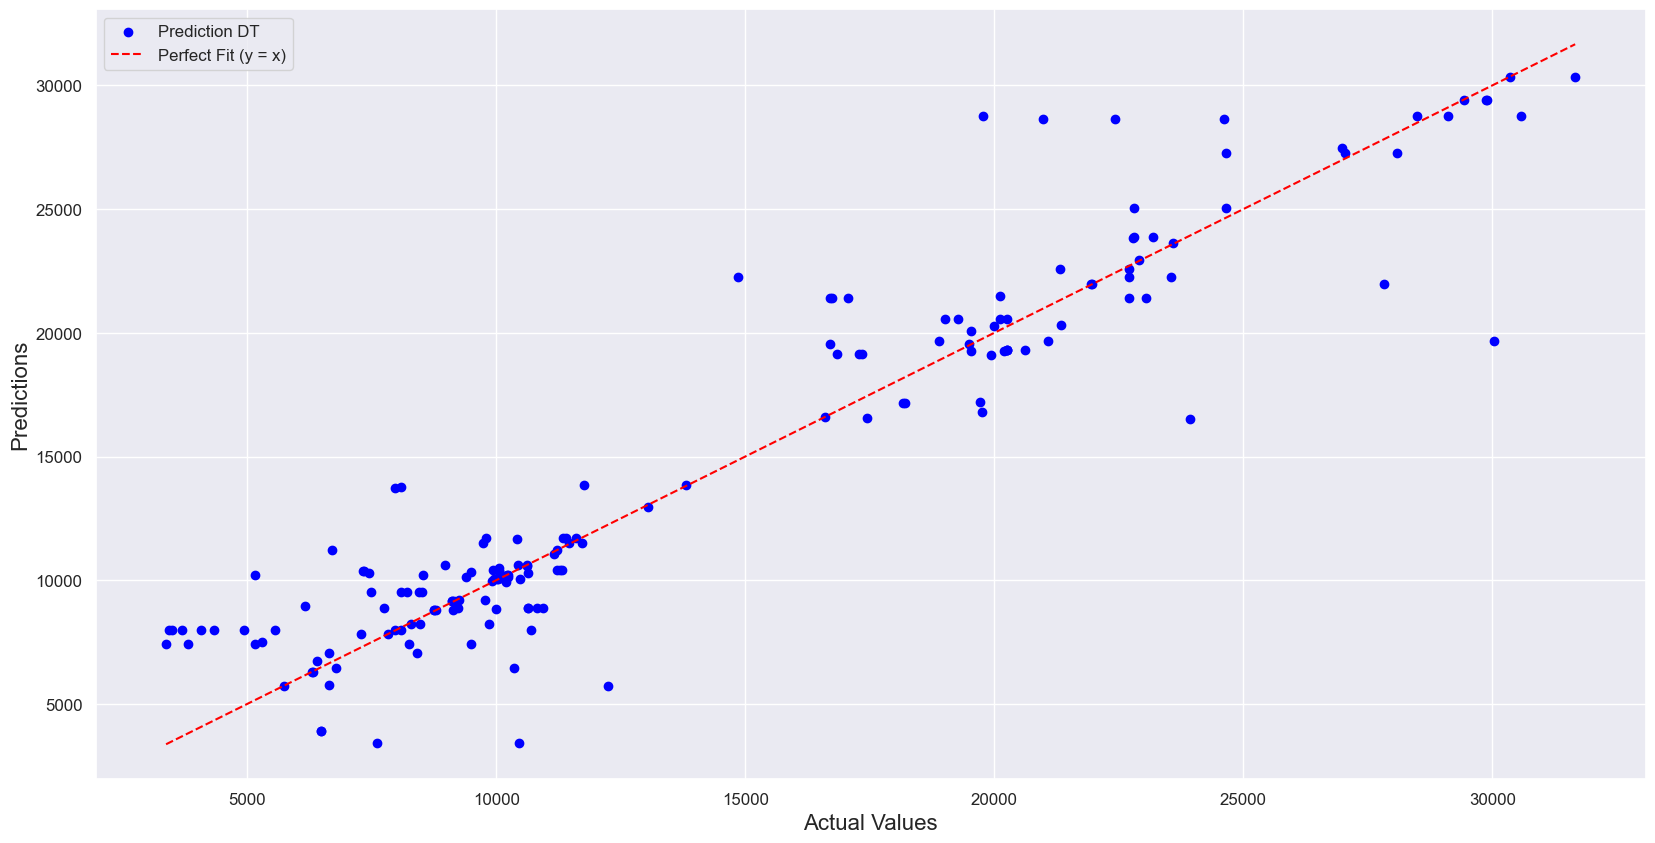

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(y_test,btc_tree.predict(X_test),color='blue',label='Prediction DT')
min_val, max_val = min(y_test.min(), btc_tree.predict(X_test).min()), max(y_test.max(), btc_tree.predict(X_test).max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Perfect Fit (y = x)")
plt.xlabel("Actual Values", fontsize=16)
plt.ylabel("Predictions", fontsize=16)
plt.legend(loc='upper left');
plt.show()

#Could work quite well with more data

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1,9)} # 15 different depth levels

btc_tree_pruned_cv = GridSearchCV(btc_tree,
                   param_grid,
                   scoring='neg_mean_squared_error', #negative since scikit always look to maximize metrics
                   cv=5 , n_jobs=1, verbose=1)

btc_tree_pruned_cv.fit(X_train,y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [41]:
print("Best parameters set found on train set:")
print()
print(btc_tree_pruned_cv.best_params_)
print()
print("Grid scores:")

means = btc_tree_pruned_cv.cv_results_['mean_test_score']
stds = btc_tree_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, btc_tree_pruned_cv.cv_results_['params']):
    print("MSE = %0.3f (+/%0.03f) for %r" % (-mean, std * 2, params))

Best parameters set found on train set:

{'max_depth': 3}

Grid scores:
MSE = 14760347.768 (+/8832134.965) for {'max_depth': 1}
MSE = 7006900.554 (+/3519916.666) for {'max_depth': 2}
MSE = 5819754.464 (+/3661087.388) for {'max_depth': 3}
MSE = 7112620.885 (+/5182664.134) for {'max_depth': 4}
MSE = 6378227.101 (+/5691501.725) for {'max_depth': 5}
MSE = 6658599.046 (+/4790111.028) for {'max_depth': 6}
MSE = 6420688.980 (+/4793774.012) for {'max_depth': 7}
MSE = 6254904.295 (+/5089006.032) for {'max_depth': 8}


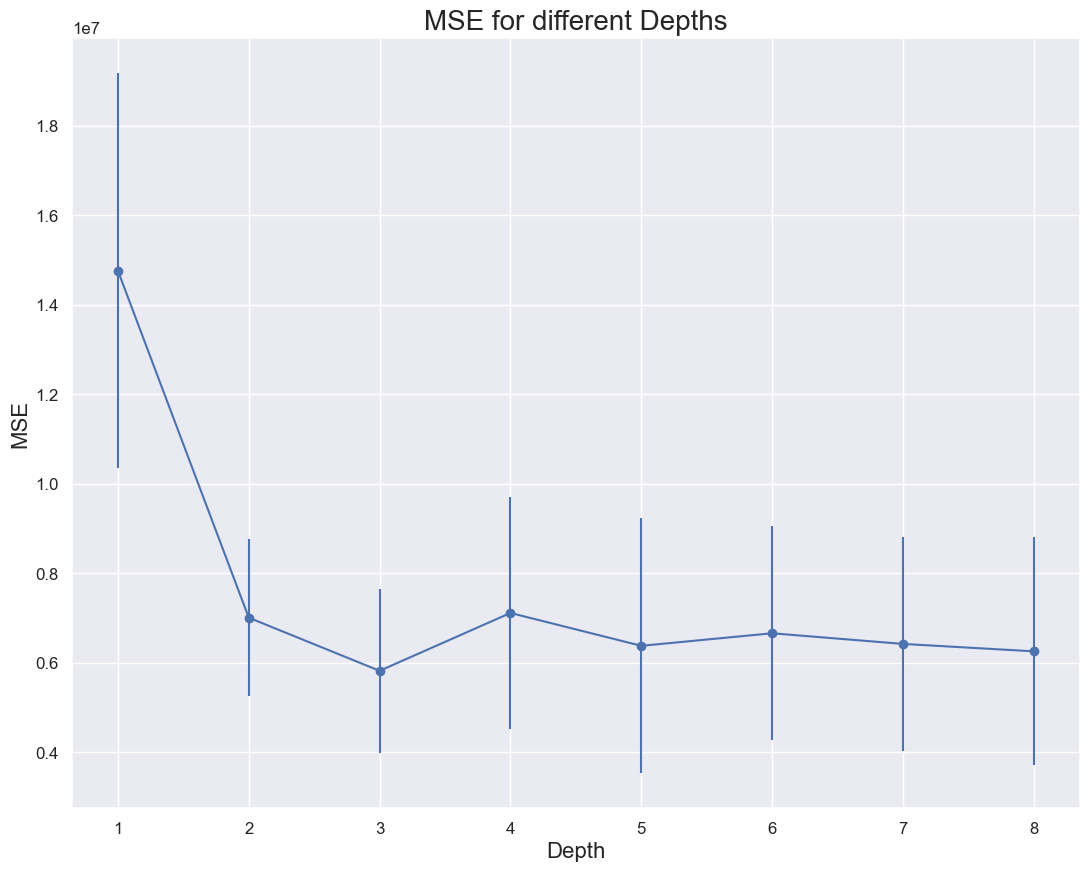

In [42]:
plt.figure(figsize=(13,10))
plt.errorbar(range(1,9,1), [-m for m in means], yerr=stds, fmt='-o')
plt.title('MSE for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("MSE", fontsize=16);

#6 is the lowest depth with the lowest error - with this amount of data it is barely prunning the tree, but it may work for more data.
#2 depths also has a very low error. 
#3 barely adds any error for slightly more complexity.

In [43]:
btc_tree_pruned = DecisionTreeRegressor(random_state=42, max_depth=6)
tree=btc_tree_pruned.fit(X_train, y_train)
predictions = btc_tree_pruned.predict(X_test)
mse_pruned = mean_squared_error(y_test, predictions)
print(f"MSE = {mse_pruned:.2f} vs. {mse:.2f} on the non-pruned tree")

mape_pruned = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAPE = {mape_pruned:.2f}% vs. {mape:.2f}% on the non-pruned tree")

#According to the model performs better for testing dara with 6 depth and then with 3 depth.

MSE = 6456439.13 vs. 6436233.17 on the non-pruned tree
MAPE = 17.22% vs. 16.86% on the non-pruned tree


In [44]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin/"
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

def plot_tree(tree, feature_names):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=feature_names,
                    filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png("boston_train.png")
    return Image(graph.create_png())

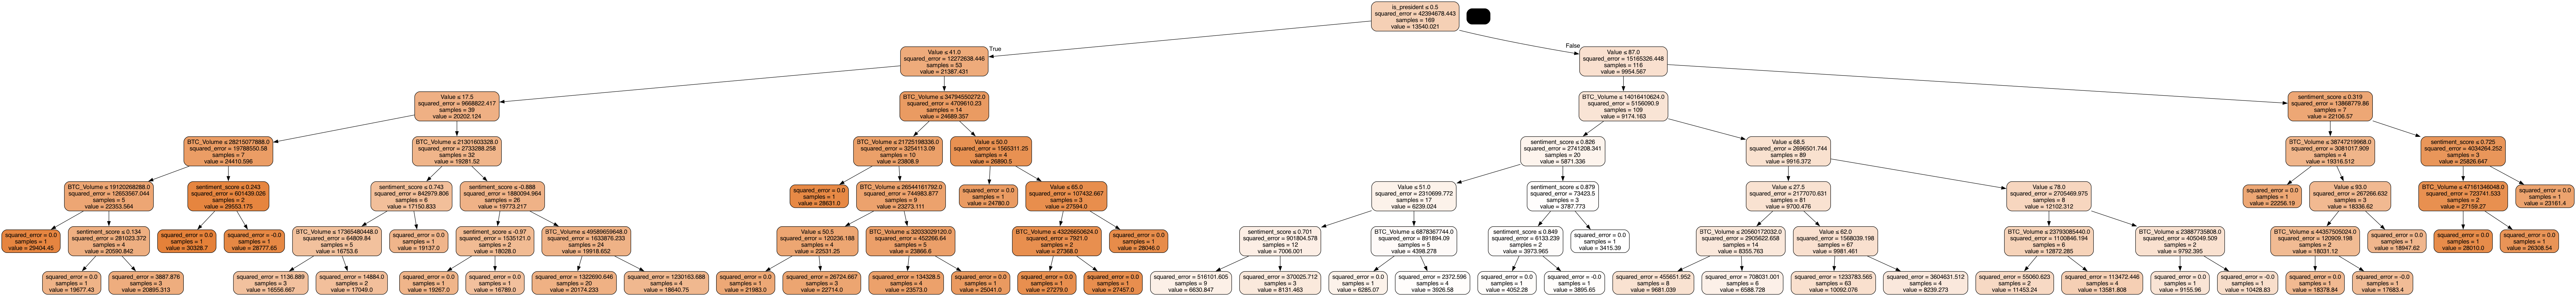

In [45]:
plot_tree(btc_tree_pruned, X_train.columns)

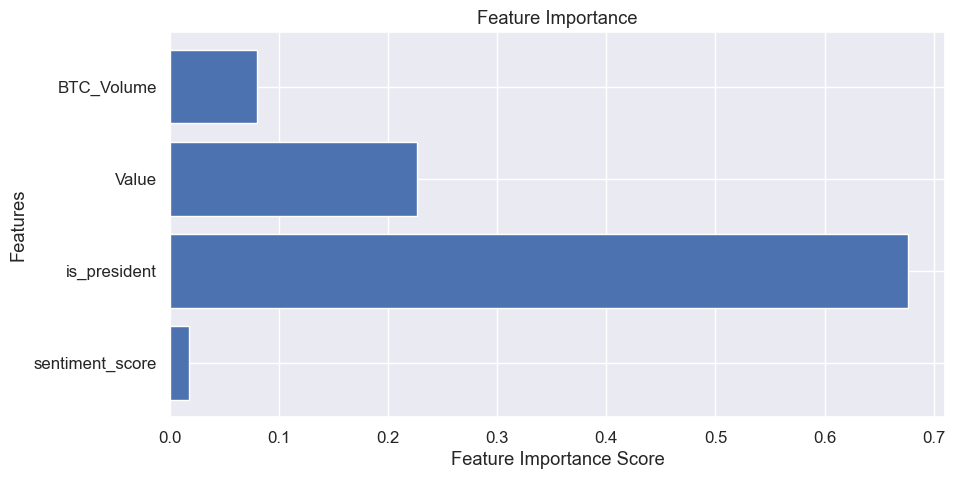

In [46]:
import matplotlib.pyplot as plt

feature_importance = tree.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,5))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on Training and Test sets
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Compute metrics
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} Results:")
    print(f"  - MAE: {mae:.2f}")
    print(f"  - RMSE: {rmse:.2f}")
    print(f"  - R² Score: {r2:.4f}\n")

# Evaluate Train and Test Sets
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")


Train Results:
  - MAE: 583.82
  - RMSE: 904.97
  - R² Score: 0.9807

Test Results:
  - MAE: 1706.94
  - RMSE: 2540.95
  - R² Score: 0.8771



In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", scores)
print("Mean CV R² Score:", scores.mean())


Cross-Validation R² Scores: [0.74182186 0.84049714 0.84848664 0.71077214 0.74752835]
Mean CV R² Score: 0.7778212241182939


### 3) RANDOM FOREST

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [51]:
# Separate features from response field
target = "btc_price_24h_later"
y = merged_df[target]
X= merged_df.drop(columns=target)

# Partition dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.5, random_state=42)

In [52]:
rf = RandomForestRegressor(n_estimators = 200, random_state=123)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=123)

In [53]:
rf_pred_tr = rf.predict(X_train)
rf_pred_ts = rf.predict(X_test)
rmse_train = mean_squared_error(y_train, rf_pred_tr)**(1/2)
rmse_test = mean_squared_error(y_test, rf_pred_ts)**(1/2)
print("Train set RMSE: %f " % (rmse_train))
print("Test set RMSE: %f " % (rmse_test))

Train set RMSE: 819.743931 
Test set RMSE: 2200.430353 


In [54]:
rf_pred_tr = rf.predict(X_train)
rf_pred_ts = rf.predict(X_test)

rmse_train = mean_squared_error(y_train, rf_pred_tr)**(1/2)
rmse_test = mean_squared_error(y_test, rf_pred_ts)**(1/2)

r2_train = r2_score(y_train, rf_pred_tr)
r2_test = r2_score(y_test, rf_pred_ts)

# Print results
print("Train set RMSE: %f" % rmse_train)
print("Test set RMSE: %f" % rmse_test)
print("Train set R²: %f" % r2_train)
print("Test set R²: %f" % r2_test)


Train set RMSE: 819.743931
Test set RMSE: 2200.430353
Train set R²: 0.984149
Test set R²: 0.907865


Text(0.5, 1.0, 'Feature Importance')

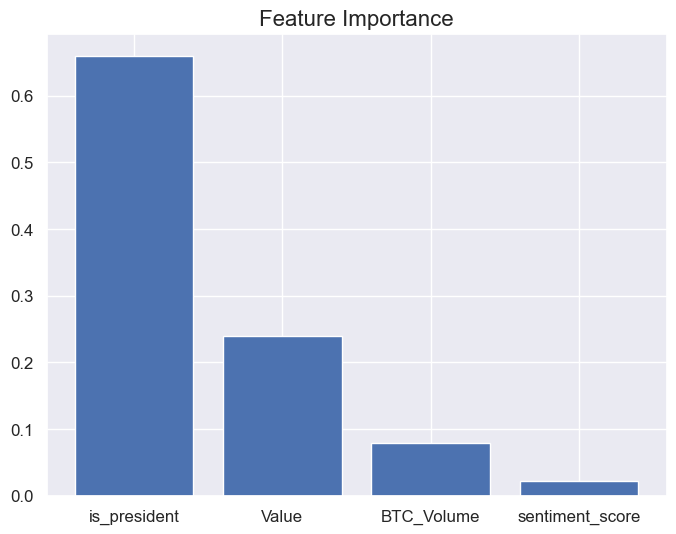

In [55]:
plt.figure(figsize=(8,6))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(X_train.columns[indices], importances[indices]) 
plt.title('Feature Importance', fontsize=16)

### 4) XGBOOST

In [57]:
#!pip install xgboost
import xgboost as xgb

# Create DMatrix for Cross Validation: an optimized & compressed matrix used to store the datasets optimally in xgboost
# It is very recommendable 
data_dmatrix = xgb.DMatrix(data=X, label=y)

xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 20)
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
preds = xg_reg.predict(X_train)
preds_test = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_train, preds))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("Attempt 1 Train RMSE: %f" % (rmse))
print("Attmept 1 Test RMSE: %f" % (rmse_test))

Attempt 1 Train RMSE: 328.408743
Attmept 1 Test RMSE: 2487.239737


In [59]:
gbm_param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'subsample':[0.3,0.4,0.5]} #subsample controls % of data used
gbm = xgb.XGBRegressor()

grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_mse.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.0s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.0s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.0s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.0s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.1s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.0s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.0s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.0s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.0s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.0s
[CV] END ..................learning_rate=0.01, subsample=0.5; total time=   0.0s
[CV] END ..................learning_rate=0.01, su

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'subsample': [0.3, 0.4, 0.5]},
             scoring='neg_mean_squared_error', verbose=2)

In [60]:
#Print best performing parameters and their RMSE scores
print('Best parameters found: ', grid_mse.best_params_)
print('Lowerst RMSE found: ', np.sqrt(np.sqrt(np.abs(grid_mse.best_score_))))

Best parameters found:  {'learning_rate': 0.1, 'subsample': 0.5}
Lowerst RMSE found:  48.592813858000525


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

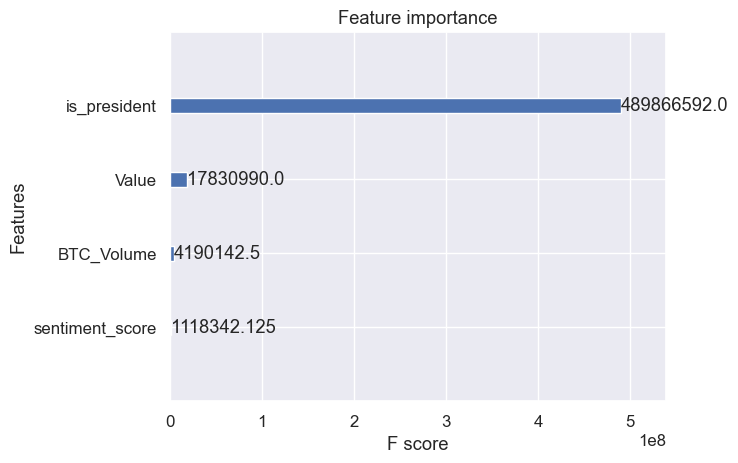

In [61]:
xgb.plot_importance(xg_reg, importance_type="gain")

# weight: number of times the variable has been used
# gain: average gain whenever variable is used
# cover: how many samples were affected by using each variable

In [62]:
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression objective
    n_estimators=20,               # Number of boosting rounds
    learning_rate=0.1,             # Best learning rate found
    subsample=0.5                  # Best subsample value found
)
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
preds = xg_reg.predict(X_train)
preds_test = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_train, preds))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("Attempt 1 Train RMSE: %f" % (rmse))
print("Attmept 1 Test RMSE: %f" % (rmse_test))

Attempt 1 Train RMSE: 1926.958422
Attmept 1 Test RMSE: 2890.802370
